## 1. Configuration

### Importing Libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Deep learning (TensorFlow and Keras)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Creating Configuration Class

In [35]:
class CFG:    
    
    # Other configurations
    color = '#F08000'
    background_color = '#262626'
    font_color = '#ffffff'
    point_color = '#FF5733'
    
    margin = dict(l=90, r=90, t=90, b=90)
    height = 900
    point_size = 50

    # Model weights and early stopping
    lgb_weight = 0.20
    ctb_weight = 0.20
    xgb_weight = 0.20
    ridge_weight = 0.20
    rfr_weight = 0.20
    early_stop = 50
    n_splits = 15

## 2. Data Preparation

### Loading Data

In [ ]:
train = pd.read_csv('../data/external/train.csv')
test = pd.read_csv('../data/external/test.csv')

### Separating Features and Labels

In [4]:
X = train.drop("label", axis=1)
y = train["label"]

### Data Normalization

In [5]:
X = X / 255.0

# Applying transformations to test.csv
X_test = test / 255.0

### Splitting Data into Training and Validation Sets

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

### Preview Images

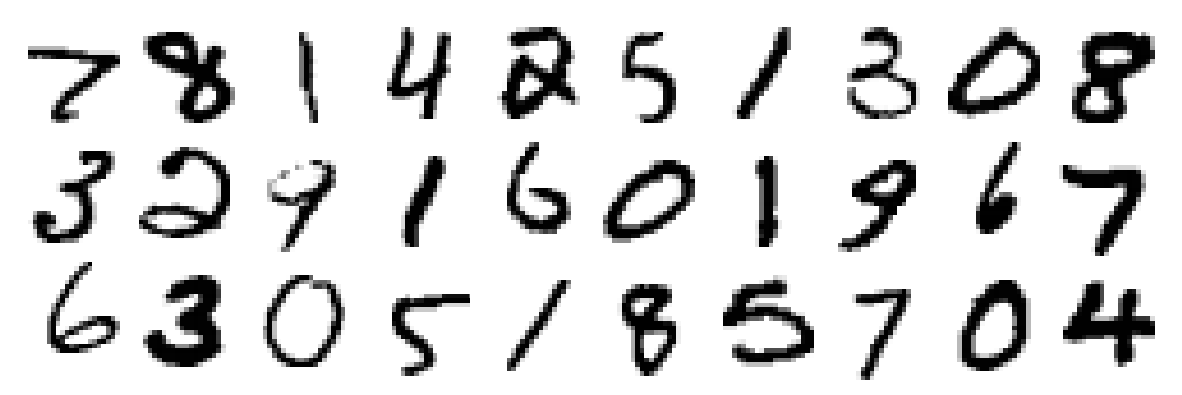

In [7]:
X_reshaped = X_train.to_numpy().reshape(-1, 28, 28, 1)

plt.figure(figsize=(15, 5))

for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_reshaped[i, :, :, 0], cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

## 3. Dense Neural Network

A dense neural network, or fully connected neural network (FCNN), connects each neuron in one layer to every neuron in the next. The model we're using has <span style="font-weight: bold">three dense layers:</span>
- The first two layers use <span style="font-weight: bold">ReLU (Rectified Linear Unit)</span> activation, which helps capture complex patterns.
- The final layer uses <span style="font-weight: bold">softmax</span> activation, which outputs probabilities for each digit (0-9) in this classification problem.

The strategy here is to start with a basic model and adjust its complexity based on how it performs.

### Defining the Model Architecture

In [8]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='softmax')
])

- <span style="font-weight: bold">Layer 1:</span>
    - ReLU replaces negative values with 0, which helps the network learn non-linear relationships and reduces the chance of vanishing gradients.
- <span style="font-weight: bold">Layer 2:</span>
    - Aadds another layer of non-linear transformations to further capture complex patterns in the data.
- <span style="font-weight: bold">Layer 3:</span>
    - Outputs probabilities for each of the 10 classes. Softmax ensures the output values sum to 1, making it suitable for multi-class classification.

Using ReLU twice here increases the model's ability to learn and represent complex features. Adding multiple layers with ReLU isn’t redundant—it’s part of building a network capable of capturing layered, hierarchical patterns in the data.

### Compiling the Model


In [9]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

- <span style="font-weight: bold">Adam</span> is an adaptive optimizer that adjusts learning rates based on the progress of training, often yielding better results than simple optimizers like Stochastic Gradient Descent (SGD).
- <span style="font-weight: bold">SparseCategoricalCrossentropy</span> is a loss function suitable for classification problems with integer-labeled data (like this, where labels are 0-9). It measures the difference between the true labels and the predicted probabilities.

### Training the Model

In [11]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9521 - val_loss: 0.2329
Epoch 2/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9474 - val_loss: 0.2693
Epoch 3/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9521 - val_loss: 0.2538
Epoch 4/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9505 - val_loss: 0.2489
Epoch 5/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9920 - loss: 0.0230 - val_accuracy: 0.9524 - val_loss: 0.2512
Epoch 6/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9526 - val_loss: 0.2557
Epoch 7/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9946 - loss: 0.0191 - val_accuracy: 0.9476 - val_loss: 0.2811
Epoch 8/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9922 - loss: 0.0235 - 

The model performs well on the training data but struggles on the validation data, indicating <span style="font-weight: bold">overfitting</span>. This happens because the model has learned specific details and noise in the training data rather than capturing general patterns, which reduces its ability to generalize to new data.

Regularization helps reduce overfitting by adding a penalty to the model’s complexity, discouraging it from “memorizing” the training data. This way, the model focuses on simpler, more meaningful patterns.

### Understanding L2 Regularization

<span style="font-weight: bold">L2 Regularization</span> (also called weight decay) penalizes large weights in the model by adding a term to the loss function, proportional to the sum of the squared weights. This encourages the model to keep weights small, leading to a smoother and more generalizable decision boundary.

### Defining a Model with L2 Regularization

In [12]:
model = Sequential([
    Dense(units=25, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=15, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=10, activation='softmax', kernel_regularizer=L2(0.001))
])

This parameter applies L2 regularization to each layer. kernel_regularizer is applied to the kernel weights (the main weights in each layer that connect it to the previous layer).

L2(0.001) means that the penalty added is proportional to the sum of the squares of the weights, multiplied by 0.001. This 0.001 is the regularization strength—higher values penalize larger weights more strongly, making the model “simpler.”

### Compiling and Training the Model

In [13]:
model.compile(
    optimizer = Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7596 - loss: 0.8735 - val_accuracy: 0.9155 - val_loss: 0.3734
Epoch 2/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9291 - loss: 0.3518 - val_accuracy: 0.9388 - val_loss: 0.3181
Epoch 3/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9393 - loss: 0.3115 - val_accuracy: 0.9414 - val_loss: 0.3026
Epoch 4/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9424 - loss: 0.3014 - val_accuracy: 0.9360 - val_loss: 0.3246
Epoch 5/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9508 - loss: 0.2800 - val_accuracy: 0.9521 - val_loss: 0.2739
Epoch 6/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9538 - loss: 0.2681 - val_accuracy: 0.9467 - val_loss: 0.2814
Epoch 7/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9560 - loss: 0.2597 - val_accuracy: 0.9545 - val_loss: 0.2703
Epoch 8/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9596 - loss: 0.2549 - 

The difference between training and validation performance has reduced. However, let's build a more complex dense neural network with additional layers, a higher number of neurons, and Dropout to further reduce overfitting, which will allow the model to learn more nuanced patterns while maintaining generalization.

- By adding more layers and neurons (units) per layer, the model can capture more detailed and complex features, which should improve accuracy.
- However, a more complex model is also more prone to overfitting. Therefore, regularization (L2) and Dropout are added to control this.
- <span style="font-weight: bold">Dropout</span> is a regularization technique where randomly selected neurons are ignored (or "dropped out") during training. This forces the network to learn more robust features that generalize better to new data, helping to prevent overfitting.

### Defining a Deeper, More Complex Model

In [15]:
model = Sequential([
    Dense(units=512, activation='relu', kernel_regularizer=L2(0.001)),  # Increased units
    Dropout(0.4),  # Add dropout to prevent overfitting
    Dense(units=256, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.4),
    Dense(units=128, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=32, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=10, activation='softmax', kernel_regularizer=L2(0.001))  
])

### Compiling and Training the Model

In [16]:
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Reduced learning rate for better convergence
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2657 - loss: 3.1987 - val_accuracy: 0.8098 - val_loss: 1.6949
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6886 - loss: 1.8662 - val_accuracy: 0.8867 - val_loss: 1.2846
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8061 - loss: 1.4826 - val_accuracy: 0.9083 - val_loss: 1.1397
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8610 - loss: 1.2919 - val_accuracy: 0.9257 - val_loss: 1.0323
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8903 - loss: 1.1601 - val_accuracy: 0.9345 - val_loss: 0.9584
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9088 - loss: 1.0613 - val_accuracy: 0.9469 - val_loss: 0.8918
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9184 - loss: 0.9803 - val_accuracy: 0.9521 - val_loss: 0.8373
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9311 - loss: 0.9089 - 

## 4. Convolutional Neural Network (CNN)

CNN is highly effective for image data, structured to capture spatial hierarchies in images, making them ideal for tasks like digit recognition.

### Reshape the Data

In [17]:
# Convert DataFrames to NumPy arrays
X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_val = X_val.to_numpy().reshape(-1, 28, 28, 1)
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

- Why Reshape the Data for CNNs?

In this dataset, images are represented as 1D arrays with 784 pixels each (flattened from a 28x28 grid). CNNs, however, work best with 2D arrays, so we need to reshape each image to a 28x28 grid with a depth of 1 (since these are grayscale images).

### Defining the CNN Model

In [20]:
model = Sequential([
    # First layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    #Second Layer
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='Same', kernel_regularizer=L2(0.0001)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Third layer
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='Same', kernel_regularizer=L2(0.0001)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),
    
    # Fully connected layer
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.2),
    
    # Output layer
    Dense(10, activation='softmax')
])

<span style="font-weight: bold">Convolutional Layers and Pooling</span>

1. First Convolotuinal Layer:
    - <span style="font-weight: bold">Conv2D(32, kernel_size=(3, 3))</span>: Applies 32 filters (small 3x3 matrices) across the image. Each filter can capture a distinct feature, such as edges or textures.
    - <span style="font-weight: bold">activation='relu'</span>: ReLU activation makes the model learn non-linear features.
    - <span style="font-weight: bold">padding='Same'</span>: Adds padding to keep the output size the same as the input size.
    - <span style="font-weight: bold">kernel_regularizer=L2(0.0001)</span>: L2 regularization helps reduce overfitting.
    - <span style="font-weight: bold">input_shape=(28, 28, 1)</span>: Specifies the input format (height, width, channels).

2. MaxPooling Layer:
    - Reduces the spatial dimensions of the feature maps by selecting the maximum value in each 2x2 window. This helps capture the most important features and reduces computation.

3. Dropout Layer:
    - Randomly drops 20% of the neurons during training, which helps prevent overfitting.

Each <span style="font-weight: bold">convolutional + pooling + dropout</span> block follows a similar structure but with an increasing number of filters in each convolutional layer. This allows the model to progressively learn more complex features.

<span style="font-weight: bold">Flatten and Dense Layers</span>

1. Flatten Layer:
    - Converts the 2D output of the final convolutional layer into a 1D vector, preparing it for the fully connected (dense) layers.

2. Dense Layer:
    - 64 neurons with ReLU activation, L2 regularization is applied to reduce overfitting.

3. Dropout Layer:
    - Drops 20% of the neurons to help prevent overfitting.

4. Output Layer:
    - 10 neurons with softmax activation

### Compiling and Training the Model

In [21]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),   
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4787 - loss: 1.5297 - val_accuracy: 0.9433 - val_loss: 0.2257
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9082 - loss: 0.3163 - val_accuracy: 0.9626 - val_loss: 0.1593
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9344 - loss: 0.2440 - val_accuracy: 0.9700 - val_loss: 0.1299
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9461 - loss: 0.2011 - val_accuracy: 0.9752 - val_loss: 0.1142
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9530 - loss: 0.1760 - val_accuracy: 0.9771 - val_loss: 0.1061
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9614 - loss: 0.1564 - val_accuracy: 0.9790 - val_loss: 0.0968
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9669 - loss: 0.1350 - val_accuracy: 0.9819 - val_loss: 0.0889
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9691 - 

### Data Augmentation

Data augmentation generates new, slightly altered versions of images by applying random transformations. This process expands the training dataset and makes the model more robust to variations in real-world data, such as rotated, shifted, or zoomed-in digits. For digit recognition, these variations are especially helpful because handwritten digits can appear with slight distortions. By using these small transformations, the model gains robustness and learns more generalizable features, reducing the chance of overfitting.

In [24]:
datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

### Defining the CNN Model with Batch Normalization

In [25]:
model = Sequential([
    # First convolutional block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    #Second convolutional block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Third convolutional block
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.3),
    
    # Output layer
    Dense(10, activation='softmax')
])

### Compiling and Training the Model

In [26]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.2394 - loss: 2.3610 - val_accuracy: 0.9124 - val_loss: 0.4081
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 55s 47ms/step - accuracy: 0.7042 - loss: 0.9476 - val_accuracy: 0.9610 - val_loss: 0.1870
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.8526 - loss: 0.5462 - val_accuracy: 0.9724 - val_loss: 0.1460
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.9010 - loss: 0.3919 - val_accuracy: 0.9836 - val_loss: 0.1147
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.9247 - loss: 0.3189 - val_accuracy: 0.9821 - val_loss: 0.1138
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 53s 45ms/step - accuracy: 0.9421 - loss: 0.2703 - val_accuracy: 0.9874 - val_loss: 0.0997
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 53s 45ms/step - accuracy: 0.9511 - loss: 0.2429 - val_accuracy: 0.9898 - val_loss: 0.0978
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 53s 45ms/step - accuracy: 0.9556 -

## 5. Model Evaluation

### Plotting Training and Validation Curves

The training and validation curves show how the model's accuracy and loss changed over time (epochs). These curves help you spot signs of overfitting or underfitting.

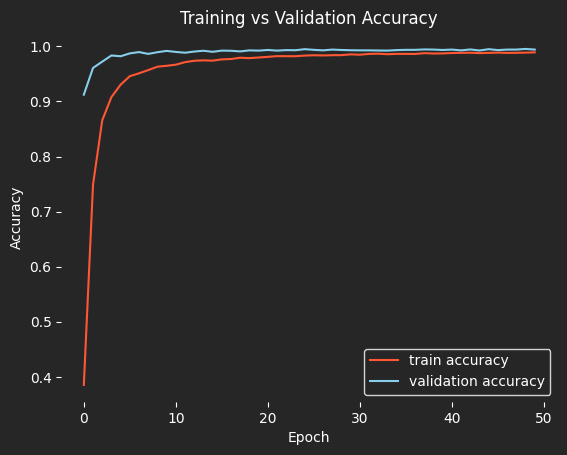

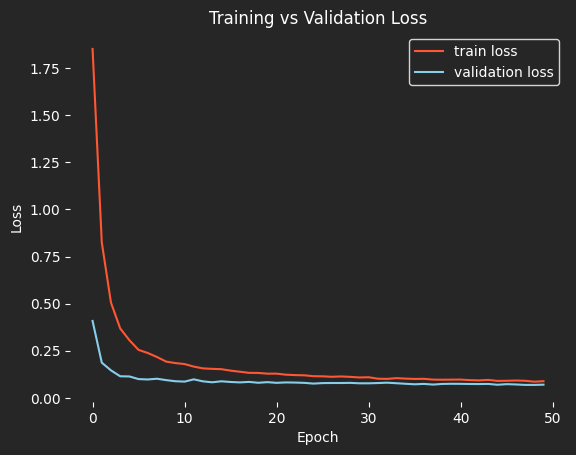

In [38]:
# Accuracy curve
fig, ax = plt.subplots()
fig.patch.set_facecolor(CFG.background_color)
ax.set_facecolor(CFG.background_color)
ax.plot(history.history['accuracy'], label='train accuracy', color=CFG.point_color)
ax.plot(history.history['val_accuracy'], label='validation accuracy', color='skyblue')
legend = ax.legend(facecolor=CFG.background_color, edgecolor=CFG.font_color)
plt.setp(legend.get_texts(), color=CFG.font_color)  # Set legend text color to white
ax.set_title("Training vs Validation Accuracy", color=CFG.font_color)
ax.set_xlabel("Epoch", color=CFG.font_color)
ax.set_ylabel("Accuracy", color=CFG.font_color)
ax.tick_params(colors=CFG.font_color)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

# Loss curve
fig, ax = plt.subplots()
fig.patch.set_facecolor(CFG.background_color)
ax.set_facecolor(CFG.background_color)
ax.plot(history.history['loss'], label='train loss', color=CFG.point_color)
ax.plot(history.history['val_loss'], label='validation loss', color='skyblue')
legend = ax.legend(facecolor=CFG.background_color, edgecolor=CFG.font_color)
plt.setp(legend.get_texts(), color=CFG.font_color)  # Set legend text color to white
ax.set_title("Training vs Validation Loss", color=CFG.font_color)
ax.set_xlabel("Epoch", color=CFG.font_color)
ax.set_ylabel("Loss", color=CFG.font_color)
ax.tick_params(colors=CFG.font_color)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

### Confusion Matrix

A confusion matrix provides a detailed view of model performance by showing how many times each digit was correctly or incorrectly predicted. Each row represents the true label, and each column represents the predicted label.

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


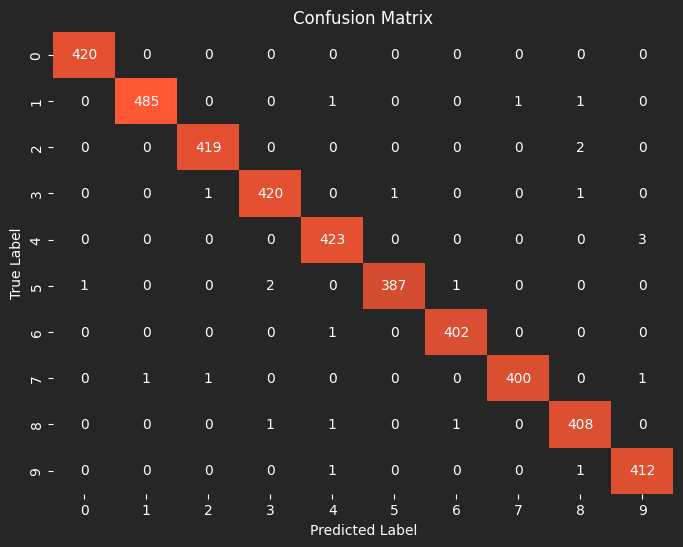

In [45]:
# 1. Make predictions on the validation set
y_pred_probs = model.predict(X_val)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# 2. Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# 3. Define class names (digits 0 to 9)
class_names = [i for i in range(10)]

# 4. Plot the confusion matrix
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [CFG.background_color, CFG.point_color])

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(CFG.background_color)
ax.set_facecolor(CFG.background_color)

# Use the custom colormap for the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, 
            xticklabels=class_names, yticklabels=class_names, cbar=False, annot_kws={"color": CFG.font_color})

# Set the colors for labels and ticks
ax.set_xlabel('Predicted Label', color=CFG.font_color)
ax.set_ylabel('True Label', color=CFG.font_color)
ax.set_title('Confusion Matrix', color=CFG.font_color)
ax.tick_params(axis='x', colors=CFG.font_color)
ax.tick_params(axis='y', colors=CFG.font_color)

# Hide spines for a cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

## 6. Predictions

In [31]:
predictions = model.predict(X_test, batch_size=128)

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step


In [32]:
predicted_classes = np.argmax(predictions, axis=1)

In [34]:
submission_df = pd.DataFrame({
    'ImageId': range(1, len(predicted_classes) + 1),
    'Label': predicted_classes
})
submission_df = pd.DataFrame({
    'ImageId': range(1, len(predicted_classes) + 1),
    'Label': predicted_classes
})
submission_df.to_csv('submission.csv', index=False)